## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [16]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [38]:
# load the features of the dataset

breast_cancer = datasets.load_breast_cancer()
list(breast_cancer.feature_names) #The names of the dataset columns.
list(breast_cancer.target_names)#The names of target classes.



['malignant', 'benign']

In [50]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

C:\Users\LINDAM\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8245614035087719


In [53]:
wine = datasets.load_wine()
list(wine.feature_names) #The names of the dataset columns.
list(wine.target_names)#The names of target classes.


['class_0', 'class_1', 'class_2']

In [56]:
# 切分訓練集/測試集
x_train2, x_test2, y_train2, y_test2 = train_test_split(wine.data,wine.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train2, y_train2)

# 預測測試集
y_pred2 = logreg.predict(x_test2)

C:\Users\LINDAM\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [57]:
acc2 = accuracy_score(y_test2, y_pred2)
print("Accuracy: ", acc2)

Accuracy:  0.8888888888888888


In [74]:
boston = datasets.load_boston()
# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston.data[:, np.newaxis, 0]#增加一個維度，取第Z欄(由0算起，第Z欄資料)
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, boston.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr3 = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr3.fit(x_train3, y_train3)

# 將測試資料丟進模型得到預測結果
y_pred3 = regr.predict(x_test3)

Data shape:  (506, 1)


In [75]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr3.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test3, y_pred3))

Coefficients:  [-0.44294703]
Mean squared error: 783.63


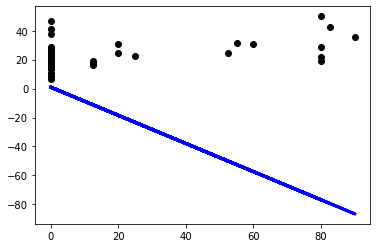

In [73]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test3, y_test3,  color='black')
plt.plot(x_test3, y_pred3, color='blue', linewidth=3)
plt.show()